### import dependency

In [116]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings

# Disable all warnings (not recommended unless you're sure)
warnings.filterwarnings("ignore")

## 1. Data Preprocessing

### Load the provided dataset and perform initial data exploration

In [14]:
# Read the Excel file into a DataFrame
data = pd.read_excel("customer_churn_large_dataset.xlsx")

# display 5 reocrd
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [15]:
# inforamtion about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [16]:
# desribe numberic column 
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [30]:
# give description to target variable for analysis
ch = {1: 'Customer left', 0: 'Customer stayed'}
data['Churn_Desc'] = data['Churn'].map(ch)

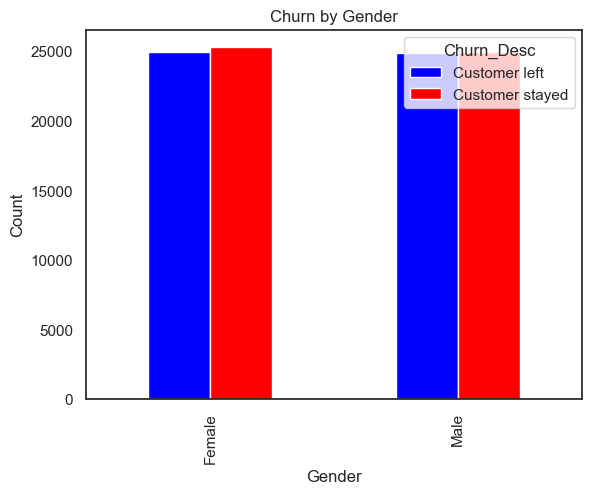

In [119]:
# Group the data by 'Gender' and 'Churn' and count the number of occurrences
gender_churn_count = data.groupby(['Gender', 'Churn_Desc']).size().unstack()

# Create a bar plot
gender_churn_count.plot(kind='bar', stacked=False, color=['blue', 'red'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn by Gender')

# Show the plot
plt.show()


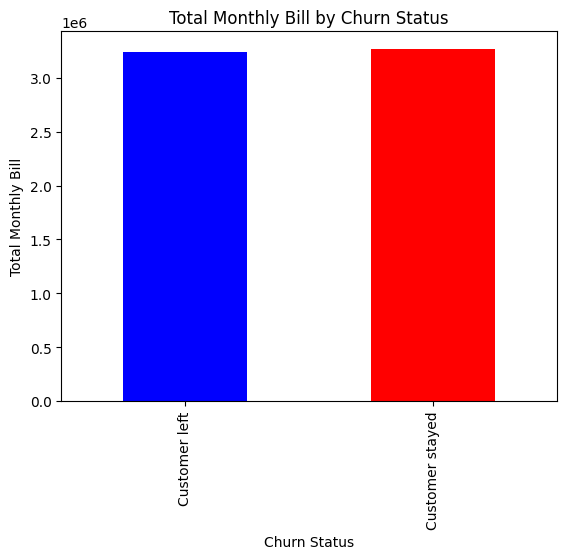

In [36]:
# Group the data by 'Churn' and calculate the sum of 'Monthly_Bill' for each group
churn_bill_sum = data.groupby('Churn_Desc')['Monthly_Bill'].sum()

# Create a bar plot
churn_bill_sum.plot(kind='bar', color=['blue', 'red'])

# Add labels and title
plt.xlabel('Churn Status')
plt.ylabel('Total Monthly Bill')
plt.title('Total Monthly Bill by Churn Status')


# Show the plot
plt.show()

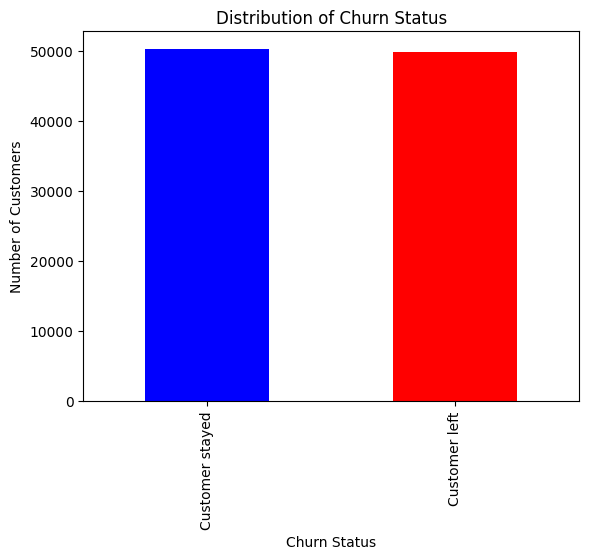

In [39]:
# Count the number of customers in each class (Stayed and Left)
churn_counts = data['Churn_Desc'].value_counts()

# Create a bar plot to visualize the class distribution
churn_counts.plot(kind='bar', color=['blue', 'red'])

# Add labels and title
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.title('Distribution of Churn Status')

# Show the plot
plt.show()

In [130]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

In [131]:
data_left = data[data['Churn'] == 0]
data_not_left = data[data['Churn'] == 0]

In [138]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Churn_Desc
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,Customer stayed
1,2,Customer_2,62,Female,New York,1,48.76,172,0,Customer stayed
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,Customer stayed
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,Customer left
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,Customer stayed


In [147]:
df = data.copy()

TypeError: countplot() got multiple values for argument 'data'

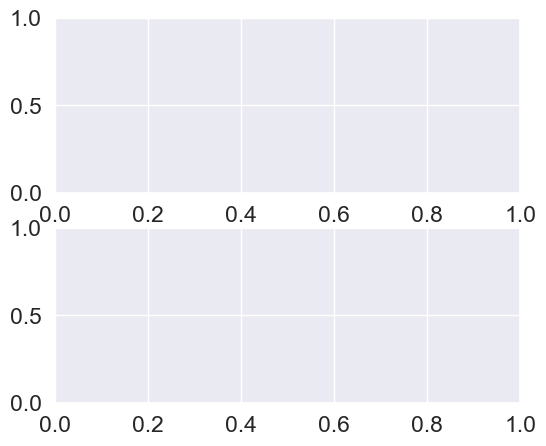

In [152]:
fig, ax = plt.subplots(2, 1, figsize=(6, 5))

sns.countplot('Location', hue='Churn', data=df, ax=ax[0])
sns.countplot('Gender', hue='Churn', data=df, ax=ax[1])

plt.tight_layout()
plt.show()


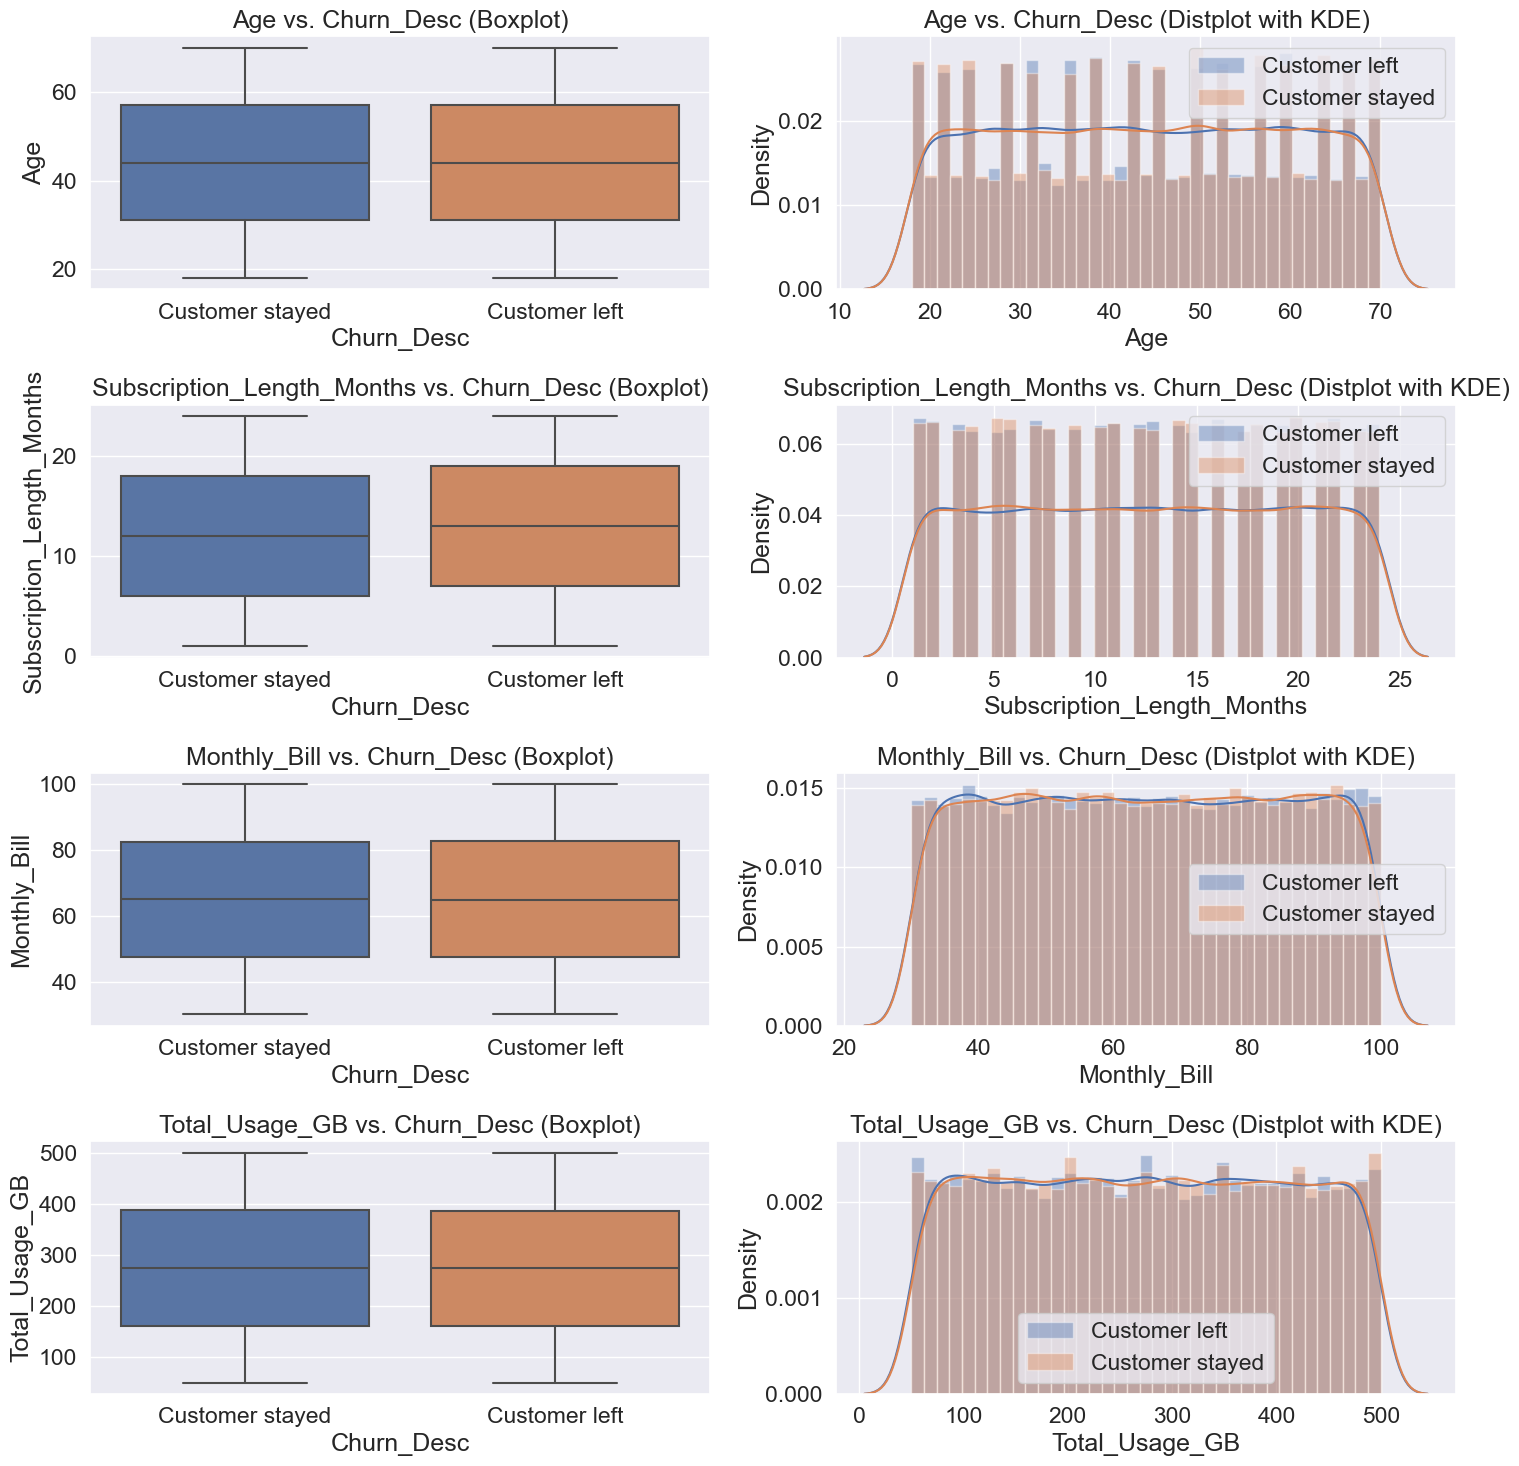

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to compare
features = ["Age", "Subscription_Length_Months", "Monthly_Bill", "Total_Usage_GB"]

# Create a single plot with subplots
fig, axes = plt.subplots(len(features), 2, figsize=(15, 15))

# Loop through each feature and create boxplots and dist plots
for i, feature in enumerate(features):
    # Create boxplots
    sns.boxplot(x='Churn_Desc', y=feature, data=df, ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} vs. Churn_Desc (Boxplot)')

    # Create dist plots with KDE
    sns.distplot(df[df['Churn_Desc'] == 'Customer left'][feature], label='Customer left', ax=axes[i, 1])
    sns.distplot(df[df['Churn_Desc'] == 'Customer stayed'][feature], label='Customer stayed', ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} vs. Churn_Desc (Distplot with KDE)')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()


### Handle missing data and outliers.

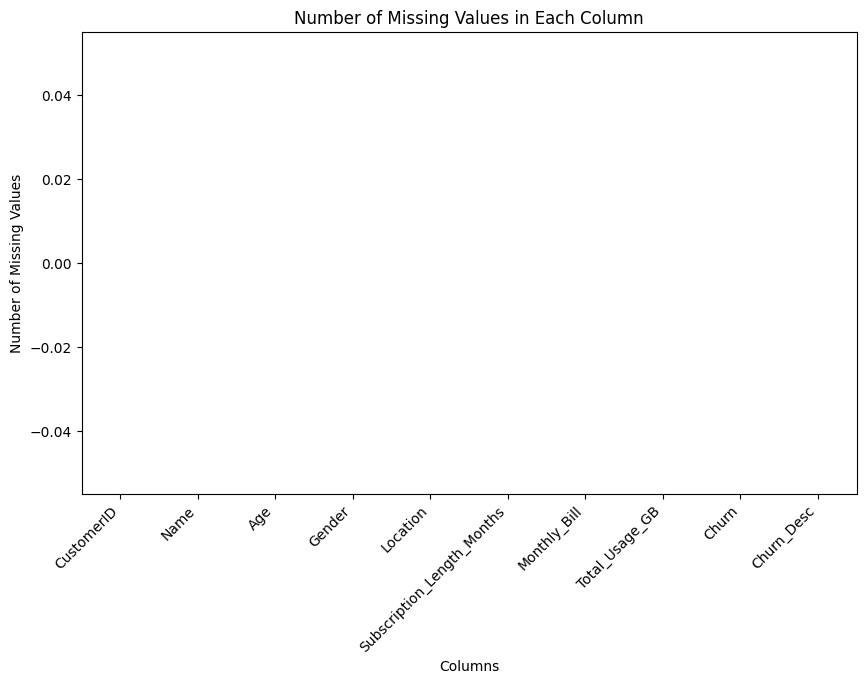

In [44]:
# Check for missing values
missing_values = data.isnull().sum()

# Plot the number of missing values in each column
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.title("Number of Missing Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.show()

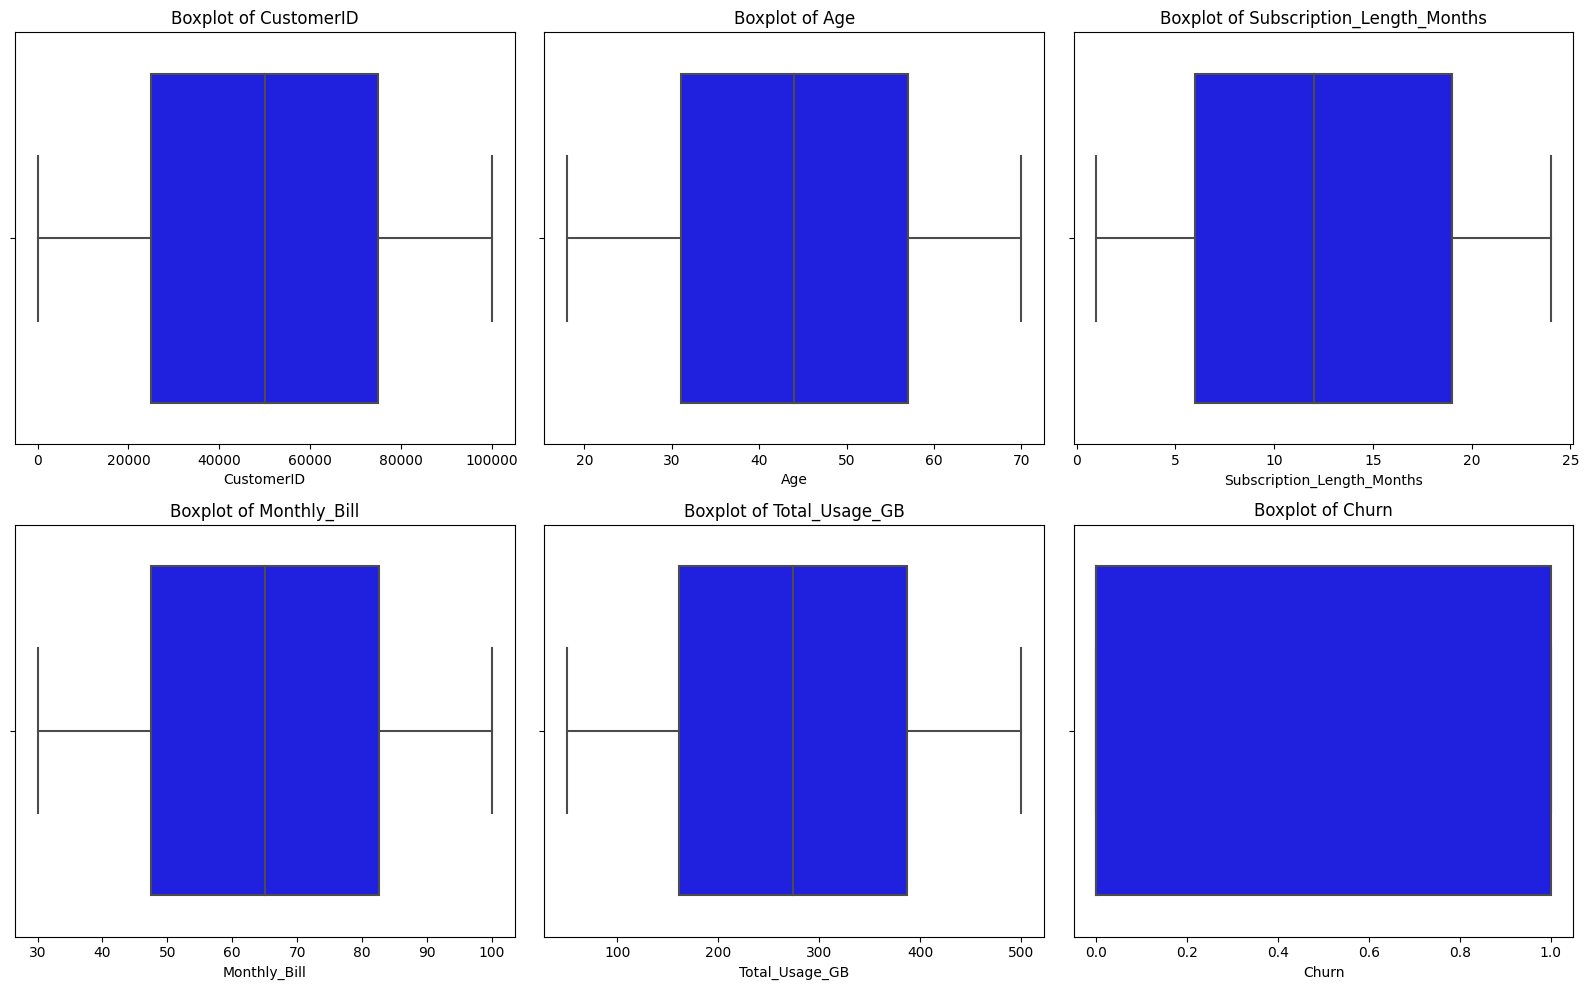

In [42]:
# Get the list of numeric column names
numeric_columns = data.select_dtypes(include='number').columns

# Create subplots for each numeric column
plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_columns):
    plt.subplot(2, len(numeric_columns)//2, i+1)  # Create a subplot
    sns.boxplot(x=data[col], color='blue')  # Create a boxplot
    plt.xlabel(col)  # Set the x-axis label as the column name
    plt.title(f'Boxplot of {col}')  # Set the title as the column name

plt.tight_layout()  # Ensure plots do not overlap
plt.show()

In [45]:
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Churn_Desc
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,Customer stayed
1,2,Customer_2,62,Female,New York,1,48.76,172,0,Customer stayed
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,Customer stayed
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,Customer left
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,Customer stayed
...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1,Customer left
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0,Customer stayed
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1,Customer left
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1,Customer left


In [56]:
data.groupby('Churn_Desc')['Location'].value_counts()

Churn_Desc       Location   
Customer left    Miami          10076
                 New York        9979
                 Chicago         9945
                 Houston         9899
                 Los Angeles     9880
Customer stayed  Houston        10258
                 Los Angeles    10161
                 Chicago        10013
                 Miami           9955
                 New York        9834
Name: count, dtype: int64

### Prepare the data for machine learning by encoding categorical variables and splitting it into training and testing sets.

In [63]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming you have a DataFrame named 'data' with 'Gender' and 'Location' columns

# Create a copy of the original data
data_encoded = data.copy()

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # Set drop='first' to drop one dummy column

# Encode the 'Gender' and 'Location' columns
encoded_columns = encoder.fit_transform(data_encoded[['Gender', 'Location']])

# Get the column names for the one-hot encoded features
column_names = encoder.get_feature_names_out(input_features=['Gender', 'Location'])

# Create a DataFrame from the encoded values with appropriate column names
encoded_df = pd.DataFrame(encoded_columns, columns=column_names)

# Drop the original 'Gender' and 'Location' columns from the DataFrame
data_encoded.drop(['Gender', 'Location'], axis=1, inplace=True)

# Concatenate the one-hot encoded DataFrame to the original DataFrame
data_encoded = pd.concat([data_encoded, encoded_df], axis=1)

# Now, 'Gender' and 'Location' are transformed into one-hot vectors in 'data_encoded'


In [64]:
data_encoded

,CustomerID,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Churn_Desc,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1,Customer_1,63,17,73.36,236,0,Customer stayed,1.0,0.0,1.0,0.0,0.0
1,2,Customer_2,62,1,48.76,172,0,Customer stayed,0.0,0.0,0.0,0.0,1.0
2,3,Customer_3,24,5,85.47,460,0,Customer stayed,0.0,0.0,1.0,0.0,0.0
3,4,Customer_4,36,3,97.94,297,1,Customer left,0.0,0.0,0.0,1.0,0.0
4,5,Customer_5,46,19,58.14,266,0,Customer stayed,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,23,55.13,226,1,Customer left,1.0,1.0,0.0,0.0,0.0
99996,99997,Customer_99997,62,19,61.65,351,0,Customer stayed,0.0,0.0,0.0,0.0,1.0
99997,99998,Customer_99998,64,17,96.11,251,1,Customer left,1.0,0.0,0.0,0.0,0.0
99998,99999,Customer_99999,51,20,49.25,434,1,Customer left,0.0,0.0,0.0,0.0,1.0


In [71]:
new_data = pd.DataFrame({'Gender': ['Male'], 'Location': ['Los Angeles']})

In [72]:
# Transform the new arrival data using the same encoder
encoded_values = encoder.transform(new_data[['Gender', 'Location']])

In [79]:
data_encoded.drop(['CustomerID','Name','Churn_Desc'], axis=1, inplace=True)

In [80]:
data_encoded

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,1.0,0.0,1.0,0.0,0.0
1,62,1,48.76,172,0,0.0,0.0,0.0,0.0,1.0
2,24,5,85.47,460,0,0.0,0.0,1.0,0.0,0.0
3,36,3,97.94,297,1,0.0,0.0,0.0,1.0,0.0
4,46,19,58.14,266,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
99995,33,23,55.13,226,1,1.0,1.0,0.0,0.0,0.0
99996,62,19,61.65,351,0,0.0,0.0,0.0,0.0,1.0
99997,64,17,96.11,251,1,1.0,0.0,0.0,0.0,0.0
99998,51,20,49.25,434,1,0.0,0.0,0.0,0.0,1.0


In [81]:
# splitting data into train and test
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and 'target_column' is the name of your target variable
X = data_encoded.drop('Churn', axis=1)  # Drop the target variable to get the input features
y = data_encoded['Churn']  # Select only the target variable

In [82]:
# Split the dataset into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
X_train.shape, X_test.shape

((80000, 9), (20000, 9))

## 2. Feature Engineering

### Generate relevant features from the dataset that can help improve the model's prediction accuracy.
### Apply feature scaling or normalization if necessary.

In [89]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform the specified columns
columns_to_scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

In [91]:
X_train.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
count,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,8.872902e-17,-7.025491e-17,-2.021494e-16,1.616485e-16,0.497762,0.201387,0.200175,0.201513,0.198612
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,0.499998,0.401039,0.400134,0.401132,0.398958
min,-1.702784e+00,-1.660962e+00,-1.734168e+00,-1.721423e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.519232e-01,-9.381699e-01,-8.640422e-01,-8.709129e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.061940e-03,-7.081919e-02,-2.321566e-03,-5.078445e-03,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.497993e-01,7.965315e-01,8.712645e-01,8.684183e-01,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.700660e+00,1.663882e+00,1.726558e+00,1.726590e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
# Fit the scaler to your data and transform the specified columns
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [94]:
X_test.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.003533,0.000145,-0.005874,-0.010311,0.498150,0.202300,0.201350,0.195500,0.196200
std,1.000533,1.006376,1.000906,0.998160,0.500009,0.401725,0.401019,0.396595,0.397132
min,-1.702784,-1.660962,-1.733673,-1.721423,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.851923,-0.938170,-0.876402,-0.878575,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.001062,0.073739,-0.009490,-0.012741,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.849799,0.941090,0.854950,0.845431,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.700660,1.663882,1.726558,1.726590,1.000000,1.000000,1.000000,1.000000,1.000000


## 3. Model Building:


### Choose appropriate machine learning algorithms (e.g., logistic regression, random forest, or neural networks).


In [101]:
results = pd.DataFrame(columns = ['LR', 'RF', 'LGBM', 'XGB'], index = range(4))

#### Logistic Regression

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

           0       0.51      0.63      0.56     10079
           1       0.50      0.38      0.43      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

ROC AUC score: 0.501

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.502
precision: 0.5
recall: 0.4
f1: 0.44


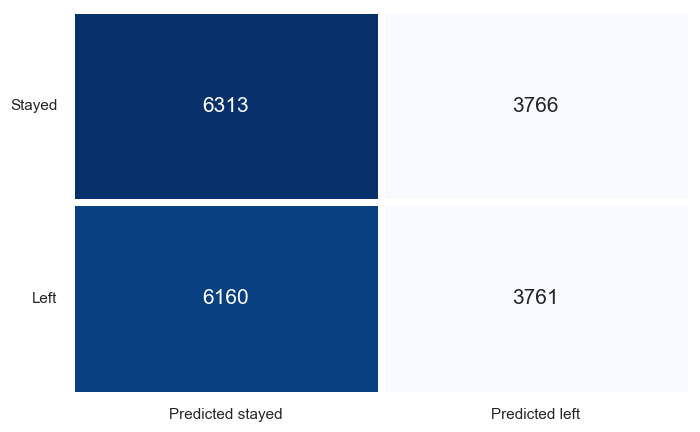

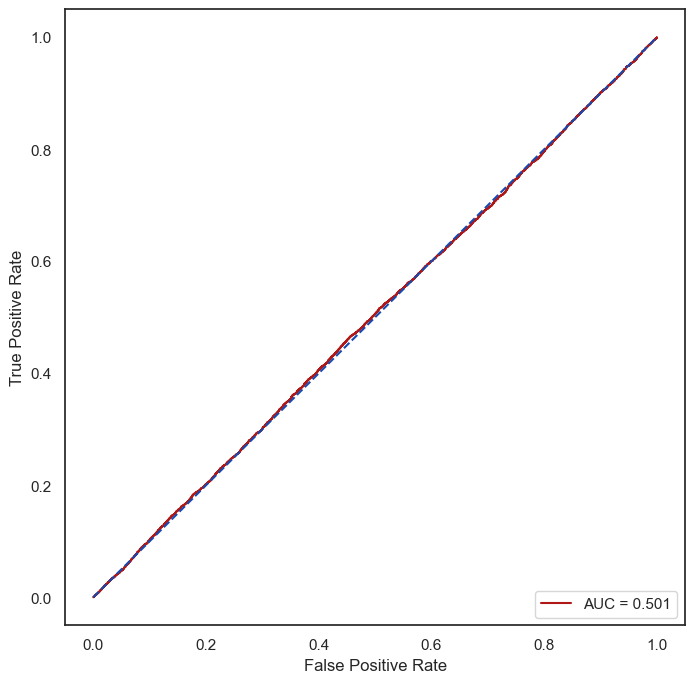

In [108]:
lg = LogisticRegression(random_state = 22)
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
y_prob = lg.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 0] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 0] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 0] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 0] = round(roc_auc_score(y_test, y_prob), 3)
lg_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(lg, X, y, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(lg, X, y, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(lg, X, y, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(lg, X, y, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(lg_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Stayed', 'Left'], xticklabels = ['Predicted stayed', 'Predicted left'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Random Forest

              precision    recall  f1-score   support

           0       0.51      0.62      0.56     10079
           1       0.50      0.38      0.43      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000

ROC AUC score: 0.501

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.504
precision: 0.5
recall: 0.32
f1: 0.39


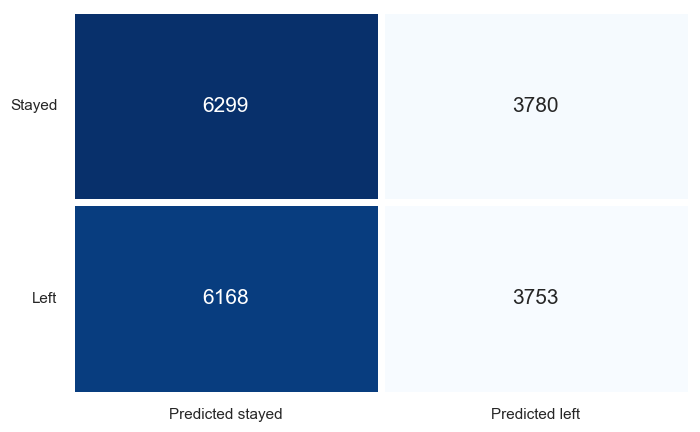

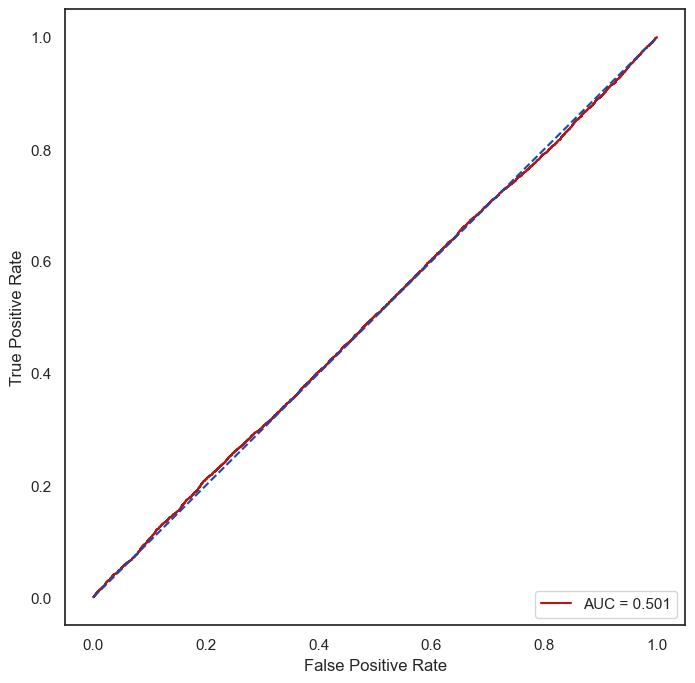

In [110]:
rf = RandomForestClassifier(random_state = 22, max_depth = 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 1] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 1] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 1] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 1] = round(roc_auc_score(y_test, y_prob), 3)
rf_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(rf, X, y, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(rf, X, y, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(rf, X, y, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(rf, X, y, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(rf_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['Stayed', 'Left'], xticklabels = ['Predicted stayed', 'Predicted left'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39858, number of negative: 40142
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 596
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498225 -> initscore=-0.007100
[LightGBM] [Info] Start training from score -0.007100
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

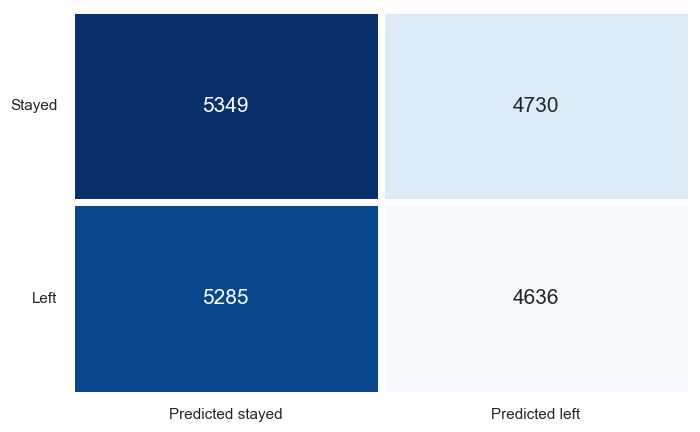

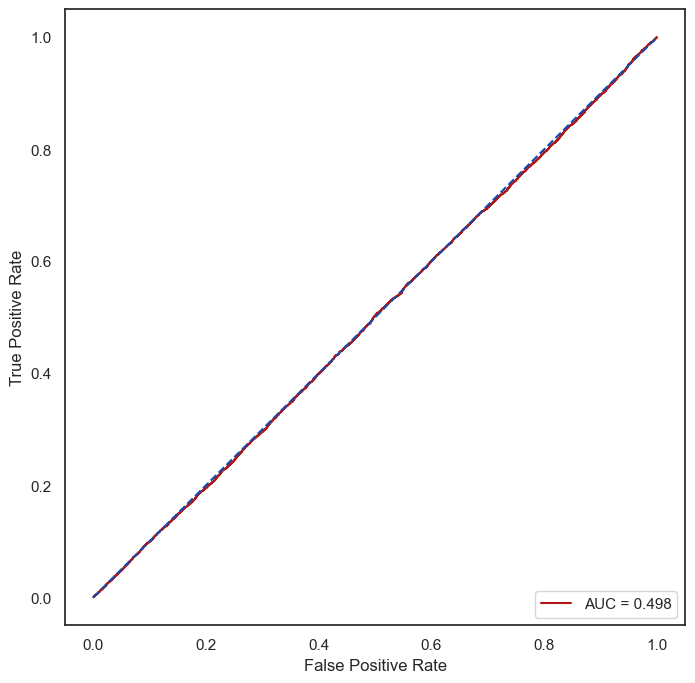

In [118]:
lgbm = LGBMClassifier(random_state = 22, max_depth = 5, num_leaves = 50)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
y_prob = lgbm.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 2] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 2] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 2] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 2] = round(roc_auc_score(y_test, y_prob), 3)
lgbm_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(lgbm, X, y, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(lgbm, X, y, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(lgbm, X, y, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(lgbm, X, y, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(lgbm_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['Stayed', 'Left'], xticklabels = ['Predicted stayed', 'Predicted left'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### XGB

              precision    recall  f1-score   support

           0       0.51      0.53      0.52     10079
           1       0.50      0.48      0.49      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

ROC AUC score: 0.503

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.503
precision: 0.5
recall: 0.47
f1: 0.49


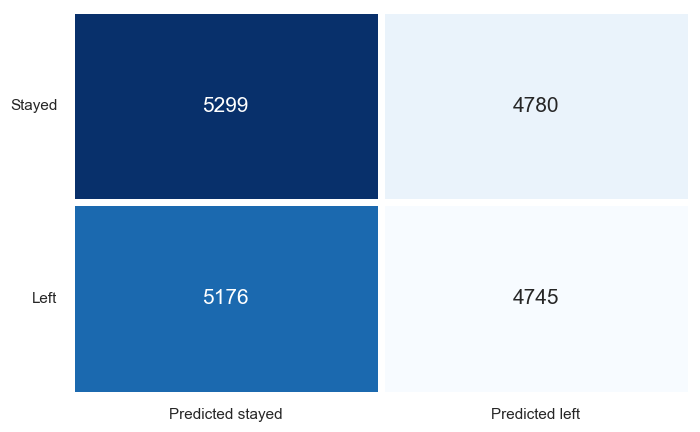

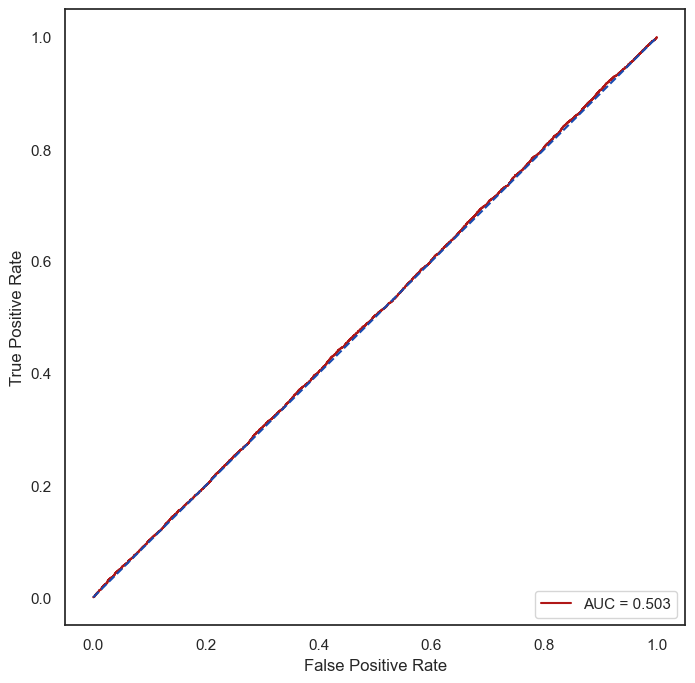

In [117]:
xgb = XGBClassifier(random_state = 22, max_depth = 5, objective = 'binary:logistic', eval_metric = 'logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 3] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 3] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 3] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 3] = round(roc_auc_score(y_test, y_prob), 3)
xgb_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(xgb, X, y, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(xgb, X, y, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(xgb, X, y, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(xgb, X, y, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(xgb_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['Stayed', 'Left'], xticklabels = ['Predicted stayed', 'Predicted left'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

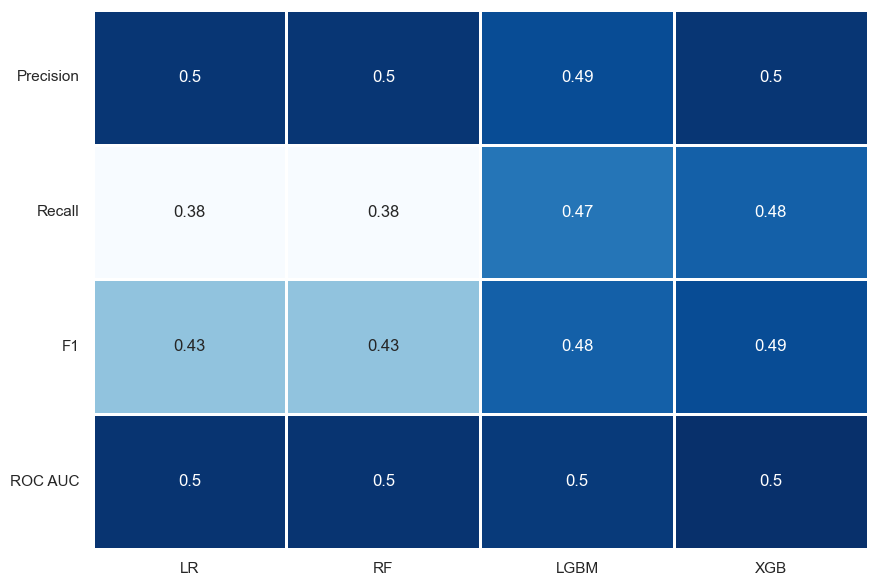

In [122]:
plt.figure(figsize = (10, 7))
sns.heatmap(results[results.columns.to_list()].astype(float), cmap = 'Blues', annot = True, linewidths = 1, cbar = False, annot_kws = {'fontsize': 12},
           yticklabels = ['Precision', 'Recall', 'F1', 'ROC AUC'])
sns.set(font_scale = 1.5)
plt.yticks(rotation = 0)
plt.show()

#### Neural Network: ANN